In [29]:
import tensorflow as tf
     

import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
t1 = tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9],
],dtype=tf.float32)
ds1 = tf.data.Dataset.from_tensors(t1) # use the tensor as the element
ds2 = tf.data.Dataset.from_tensor_slices(t1) # uses elements of a tensor as elements
     

for element in ds1:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [3]:
for element in ds2:
    print(element)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


In [4]:
train, test = tf.keras.datasets.fashion_mnist.load_data() # load the fashion mnist data
     

images, labels = train
images = images/255
type(images),type(labels)
     

4422102/4422102 [==============================] - 1s 0us/step


(numpy.ndarray, numpy.ndarray)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels)) # images as X and labels as y
dataset 
     

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [6]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name) # download each file using tf.keras.get_file
    for file_name in file_names
]

807992/807992 [==============================] - 0s 0us/step


In [7]:

text_line_dataset = tf.data.TextLineDataset(file_paths)
     

for line in text_line_dataset.take(5):
    print(line.numpy()) # elements are of type tensor so converted to numpy type

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [8]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin=data_url,
    untar=True, # data set is a tar.gz file so untar is used to uncompress the dataset
    cache_dir= "stack_overflow",
    cache_subdir = ""
)
print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent
train_dir = dataset_dir/'train'
train_dir

6053168/6053168 [==============================] - 1s 0us/step
/tmp\.keras\stack_overflow_16k


WindowsPath('/tmp/.keras/train')

In [9]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)


Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [12]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 [==============================] - 0s 1us/step


In [13]:
df = pd.read_csv(titanic_file)
titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))
     

for feature_batch in titanic_dataset.take(1):
    for key,value in feature_batch.items():
        print("  {!r:20s}: {}".format(key,value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


In [14]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=4,# Setting the batch size
    label_name="survived", # selecting the label column
    select_columns=['class', 'fare', 'survived']
)

     

for feature_batch, label_batch in titanic_batches.take(1):
    print(f"Survived: {label_batch}")
    for key,value in feature_batch.items():
        print(f"{key:20s}: {value}")

Survived: [0 0 0 0]
fare                : [10.5    61.175   8.6625 15.5   ]
class               : [b'Second' b'First' b'Third' b'Third']


In [15]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)
flowers_root = pathlib.Path(flowers_root)

228813984/228813984 [==============================] - 43s 0us/step


In [16]:
for item in flowers_root.glob("*"):
    print(item)
     

C:\Users\GFLAB\.keras\datasets\flower_photos\daisy
C:\Users\GFLAB\.keras\datasets\flower_photos\dandelion
C:\Users\GFLAB\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\GFLAB\.keras\datasets\flower_photos\roses
C:\Users\GFLAB\.keras\datasets\flower_photos\sunflowers
C:\Users\GFLAB\.keras\datasets\flower_photos\tulips


In [17]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
     

def process_path(file_path):
    # folder name or label will be the second last value
    # when seperated using tf.strings.split with os.sep as seperator
    label = tf.strings.split(file_path,os.sep)[-2] 
    return tf.io.read_file(file_path),label
     

labeled_ds = file_path_ds.map(process_path)
     

for image_raw, label in labeled_ds.take(1):
    print(image_raw,label,sep="\n") # image is  loaded in binary and not as numpy array
     

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01C\x01C\x00\x00\xff\xed\x00RPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x00\x008BIM\x04\n\x00\x00\x00\x00\x00\x01\x00\x008BIM\x04\r\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e8BIM\x04\x19\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e\xff\xe1\x144XMP\x00://ns.adobe.com/xap/1.0/\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\n<x:xmpmeta xmlns:x=\'adobe:ns:meta/\' x:xmptk=\'Image::ExifTool 8.18\'>\n<rdf:RDF xmlns:rdf=\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\'>\n\n <rdf:Description rdf:about=\'\'\n  xmlns:dc=\'http://purl.org/dc/elements/1.1/\'>\n  <dc:format>image/jpeg</dc:format>\n </rdf:Description>\n\n <rdf:Description rdf:about=\'\'\n  xmlns:exif=\'http://ns.adobe.com/exif/1.0/\'>\n  <exif:ColorSpace>-1</exif:ColorSpace>\n  <exif:NativeDigest>36864,40960,40961,37121,37122,40962,40963,37510,40964,36867,36868,33434,33437,34850,34852,34855,34856,37377,37378,37379,37380,37381,373

In [18]:

# sample datasets
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset)) # joining both inc and dec

# batching the dataset
batched_dataset = dataset.batch(4) # try with a different batch size

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])


[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [19]:
batched_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
dataset.batch(4,drop_remainder = True)
     

<BatchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

In [21]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None,)) # (None,) uses the largest size as padding

for batch in padded_batch_dataset.take(2):
  print(batch.numpy())
  print()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [22]:
dataset = tf.data.TextLineDataset(titanic_file)
     

dataset.shuffle(buffer_size=10)

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

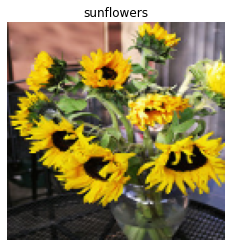

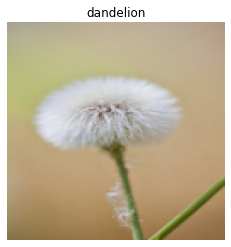

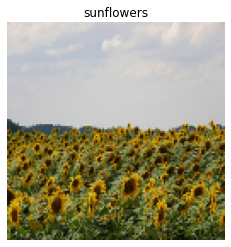

In [23]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
     

def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label
     

image_ds = file_path_ds.map(parse_image)
     

def show(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()
     

for image,label in image_ds.take(3):
    show(image,label)

In [31]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)
     

In [32]:

fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
     
model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 793us/step - loss: 0.6017 - accuracy: 0.7961
Epoch 2/2
1875/1875 [==============================] - 1s 761us/step - loss: 0.4620 - accuracy: 0.8417


In [33]:
loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1875/1875 [==============================] - 1s 683us/step - loss: 0.4496 - accuracy: 0.8439
Loss : 0.44958505034446716
Accuracy : 0.8438833355903625


In [34]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32) # creating a dataset with only images
result = model.predict(predict_ds, steps = 10)
print(result.shape)

10/10 [==============================] - 0s 884us/step
(320, 10)
